## Problem statement

#### A taxi organization decided to segment thier customers according to thier ride behaviour and assign the price segment to the customer . So group undertake this as problem statement to provide solution in means of machine learning and deep learning as well. 

#### This problem statement comes under classification, because we have to predict the suitable price category that the customer can fit in. 

## Data acquisition

In [185]:
import pandas as pd

In [4]:
data_raw = pd.read_csv(r"C:\Users\Gobinath\Desktop\tasks\taxi customer segmentation\sigma_cabs.csv")

#### Data details

#### 1.Size of the train data contains 131662 observations, 14 features
#### 2.type of data attribute includes  


    Trip_ID: ID for TRIP

    Trip_Distance: The distance for the trip requested by the customer

    TypeofCab: Category of the cab requested by the customer

    CustomerSinceMonths: Customer using cab services since n months; 0 month means current month

    LifeStyleIndex: Proprietary index created by Sigma Cabs showing lifestyle of the customer based on their behaviour

    ConfidenceLifeStyle_Index: Category showing confidence on the index mentioned above

    Destination_Type: Sigma Cabs divides any destination in one of the 14 categories.

    Customer_Rating: Average of life time ratings of the customer till date

    CancellationLast1Month: Number of trips cancelled by the customer in last 1 month

    Var1, Var2 and Var3: Continuous variables masked by the company. Can be used for modelling purposes

    Gender: Gender of the customer

    SurgePricingType: Target (can be of 3 types)

## Understanding the data

In [5]:
data_raw.head(10)

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,T0005689460,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2
1,T0005689461,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2
2,T0005689464,41.58,NaN,10.0,NaN,NaN,E,3.50125,2,NaN,56,77,Male,2
3,T0005689465,61.56,C,10.0,NaN,NaN,A,3.45375,0,NaN,52,74,Male,3
4,T0005689467,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2
5,T0005689469,19.06,E,10.0,NaN,NaN,A,2.59750,1,72.0,63,91,Male,3
6,T0005689470,29.72,E,10.0,2.83958,C,B,2.97500,1,83.0,50,75,Male,2
7,T0005689472,18.44,B,2.0,2.81871,B,A,3.58250,0,103.0,46,63,Male,2
8,T0005689473,106.80,C,3.0,NaN,NaN,A,3.14625,0,NaN,58,92,Male,2
9,T0005689474,107.19,D,5.0,3.04467,B,A,2.44375,1,NaN,58,83,Male,3


In [6]:
data_raw.isna().sum()

Trip_ID                            0
Trip_Distance                      0
Type_of_Cab                    20210
Customer_Since_Months           5920
Life_Style_Index               20193
Confidence_Life_Style_Index    20193
Destination_Type                   0
Customer_Rating                    0
Cancellation_Last_1Month           0
Var1                           71030
Var2                               0
Var3                               0
Gender                             0
Surge_Pricing_Type                 0
dtype: int64

#### Observation: From the  above data we can find the missing values.

In [81]:
data_raw.dtypes

Trip_Distance                  float64
Type_of_Cab                     object
Customer_Since_Months          float64
Life_Style_Index               float64
Confidence_Life_Style_Index     object
Destination_Type                object
Customer_Rating                float64
Cancellation_Last_1Month         int64
Var1                           float64
Var2                             int64
Var3                             int64
Gender                          object
Surge_Pricing_Type               int64
dtype: object

#### Observation: From  the above data we can find the datatypes of the input features

In [7]:
data_raw.shape

(131662, 14)

#### Acquired data dimension can be observed from above.

## Data wrangling and handling missing data

In [8]:
data_raw['Var1'].mean()

64.20269824515107

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

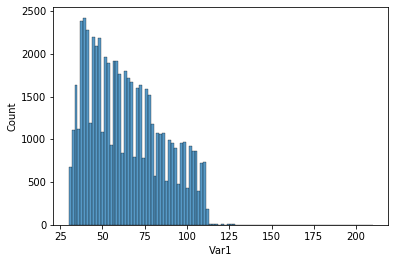

In [10]:
sns.histplot(data = data_raw['Var1'])

#### Observing the distribution of data inorder to replace the missing values. and also the presence of outliers.Since mean and median is nearly same for continuous feature have been observed. we can replace missing data with mean. 

In [11]:
data_raw['Var1']=data_raw['Var1'].fillna(64.0)

In [12]:
data_raw['Type_of_Cab'] = data_raw['Type_of_Cab'].fillna('B')

In [13]:
#data_raw['Customer_Since_Months'].mean()
data_raw['Customer_Since_Months'].median()

6.0

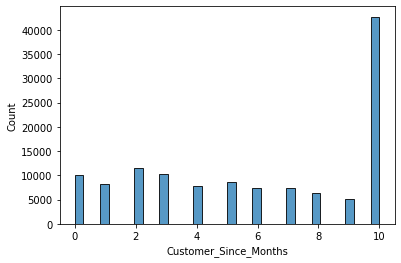

In [14]:
sns.histplot(data = data_raw['Customer_Since_Months'])

In [15]:
data_raw['Customer_Since_Months'] = data_raw['Customer_Since_Months'].fillna(6.0)

2.79805

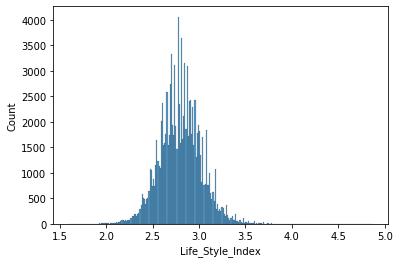

In [16]:
sns.histplot(data = data_raw['Life_Style_Index'])
data_raw['Life_Style_Index'].median()

In [17]:
data_raw['Life_Style_Index']=data_raw['Life_Style_Index'].fillna(2.80)

In [18]:
#data_raw['Confidence_Life_Style_Index'].mode()
data_raw['Confidence_Life_Style_Index']=data_raw['Confidence_Life_Style_Index'].fillna('B')

In [19]:
test_data_raw=pd.read_csv(r"C:\Users\Gobinath\Desktop\tasks\taxi customer segmentation\test.csv")

In [20]:
test_data_raw.shape

(87395, 13)

In [21]:
test_data_raw.isna().sum()

Trip_ID                            0
Trip_Distance                      0
Type_of_Cab                    13158
Customer_Since_Months           3966
Life_Style_Index               13327
Confidence_Life_Style_Index    13327
Destination_Type                   0
Customer_Rating                    0
Cancellation_Last_1Month           0
Var1                           46789
Var2                               0
Var3                               0
Gender                             0
dtype: int64

In [22]:
test_data_raw['Var1'].mean()

63.93661035314978

In [23]:
test_data_raw['Var1'] = test_data_raw['Var1'].fillna(63.93)

In [24]:
test_data_raw['Type_of_Cab'].mode()

0    B
dtype: object

In [25]:
test_data_raw['Type_of_Cab']=test_data_raw['Type_of_Cab'].fillna('B')

In [26]:
test_data_raw.isnull().sum()

Trip_ID                            0
Trip_Distance                      0
Type_of_Cab                        0
Customer_Since_Months           3966
Life_Style_Index               13327
Confidence_Life_Style_Index    13327
Destination_Type                   0
Customer_Rating                    0
Cancellation_Last_1Month           0
Var1                               0
Var2                               0
Var3                               0
Gender                             0
dtype: int64

In [27]:
test_data_raw['Customer_Since_Months']=test_data_raw['Customer_Since_Months'].fillna(6)

In [28]:
test_data_raw.head(10)

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender
0,T0005689459,9.44,A,10.0,2.57438,A,B,3.68000,2,63.93,46,63,Male
1,T0005689462,32.15,B,10.0,2.85143,A,A,1.59375,0,65.00,49,80,Female
2,T0005689463,10.38,C,4.0,2.70530,A,D,4.50500,0,63.93,47,74,Male
3,T0005689466,14.94,B,6.0,2.48159,C,E,4.53000,0,63.00,43,54,Male
4,T0005689468,32.03,B,7.0,2.81598,A,K,4.60125,3,96.00,44,56,Male
5,T0005689471,18.26,E,2.0,NaN,NaN,A,3.58250,2,35.00,56,78,Female
6,T0005689476,47.34,E,0.0,2.59558,C,B,0.84125,0,63.93,60,73,Female
7,T0005689478,43.19,B,10.0,2.94979,A,L,3.48750,2,63.93,57,99,Male
8,T0005689480,45.41,C,7.0,2.64639,C,B,2.48125,0,39.00,53,75,Male
9,T0005689481,5.75,E,3.0,2.65139,C,C,3.01500,3,47.00,49,67,Male


In [29]:
test_data_raw['Life_Style_Index']=test_data_raw['Life_Style_Index'].fillna(2.80339)
#test_data_raw['Life_Style_Index'].mean()

In [30]:
test_data_raw['Confidence_Life_Style_Index']=test_data_raw['Confidence_Life_Style_Index'].fillna('B')

#### Observing the distribution of data inorder to replace the missing values. and also the presence of outliers.Since mean and median is nearly same for continuous feature have been observed. we can replace missing data with mean. 

#### Observing the distribution of data inorder to replace the missing values. and also the presence of outliers,for the distribution of the data

In [31]:
data_raw = data_raw.drop(['Trip_ID'],axis=1)

### summary
1.to remove duplicate data, if present - no duplicate data observed.
2.to impute or remove missing data, if present - no remove the missing data replacement with mean for continuous features and mode for discrete feature.
3.to remove data inconsistencies, if present-Other than missing data no inconsistencies observed.
4.to encode categorical data - Label encoder has 

## Data preprocessing

In [38]:
from sklearn.preprocessing import OneHotEncoder

In [32]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [88]:
#x = data_raw.drop(['Surge_Pricing_Type'],axis=1)
#y=data_raw[['Surge_Pricing_Type']]
#y['Surge_Pricing_Type']=y['Surge_Pricing_Type'].astype(str)
#y= pd.get_dummies(y, columns = ['Surge_Pricing_Type'])
y.head(10)

,Surge_Pricing_Type_1,Surge_Pricing_Type_2,Surge_Pricing_Type_3
0,0,1,0
1,0,1,0
2,0,1,0
3,0,0,1
4,0,1,0
5,0,0,1
6,0,1,0
7,0,1,0
8,0,1,0
9,0,0,1


#### Since the problem statement falls under multiclass classification.We decided to go for categorical cross entropy and we transformed the target feature inorder to feed it into the model.

In [42]:
oe = OrdinalEncoder()
x_enc = oe.fit_transform(x)

In [56]:
#ohe = OneHotEncoder()
le = LabelEncoder()
y_enc = le.fit_transform(y)

C:\Users\Gobinath\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [57]:
x_enco=pd.DataFrame(x_enc,columns=x.columns)
y_enco=pd.DataFrame(y_enc,columns=y.columns)

In [58]:
x_enco.shape,y_enco.shape

((131662, 12), (131662, 1))

## Splitting the training and testing data

In [89]:
x_train,x_test,y_train,y_test = train_test_split(x_enco,y,test_size=0.3,random_state=12,stratify=y)

In [90]:
x_train.shape,y_train.shape

((92163, 12), (92163, 3))

In [91]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
x_train_scaled = std_scaler.fit_transform(x_train)
x_test_scaled = std_scaler.fit_transform(x_test)
#x_train_scaled = pd.DataFrame(x_train_scaled,columns=data_raw.columns)

#### obeservation: Inorder to standardize the values between -1 to 1 to increase the model efficiency.

In [186]:
from sklearn.preprocessing import MinMaxScaler
mm_scaler = MinMaxScaler()
x_train_m_scaled = mm_scaler.fit_transform(x_train)
x_test_m_scaled = mm_scaler.fit_transform(x_test)

#### obeservation: Inorder to standardize the values between 0 to 1 to increase the model efficiency.

In [92]:
x_train_scaled = pd.DataFrame(x_train_scaled,columns=x_enco.columns)
x_test_scaled = pd.DataFrame(x_test_scaled,columns=x_enco.columns)

In [188]:
x_train_m_scaled = pd.DataFrame(x_train_m_scaled,columns=x_enco.columns)
x_test_m_scaled = pd.DataFrame(x_test_m_scaled,columns=x_enco.columns)

In [189]:
x_train_m_scaled

,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender
0,0.265569,0.50,0.2,0.209572,0.5,0.000000,0.464122,0.000000,0.280992,0.140351,0.127660,0.0
1,0.430024,0.25,1.0,0.472524,0.0,0.076923,0.513232,0.000000,0.280992,0.315789,0.382979,1.0
2,0.435254,0.25,0.8,0.161730,1.0,0.076923,0.262595,0.000000,0.355372,0.315789,0.276596,1.0
3,0.258499,0.25,0.9,0.824282,0.0,0.000000,0.500509,0.285714,0.553719,0.228070,0.244681,1.0
4,0.060726,0.25,0.3,0.501286,0.5,0.000000,0.895674,0.000000,0.305785,0.122807,0.138298,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
92158,0.134818,0.25,1.0,0.647456,0.5,0.307692,0.384987,0.571429,0.239669,0.526316,0.414894,1.0
92159,0.971913,0.50,0.5,0.654137,0.5,0.384615,0.866412,0.000000,0.264463,0.052632,0.276596,0.0
92160,0.176949,0.50,0.3,0.053416,1.0,0.000000,0.828499,0.285714,0.280992,0.122807,0.074468,1.0
92161,0.156029,0.50,1.0,0.409461,0.0,0.000000,0.315013,0.142857,0.066116,0.140351,0.212766,0.0


In [190]:
x_train_m_scaled.shape

(92163, 12)

In [94]:
y_train.dtypes

Surge_Pricing_Type_1    uint8
Surge_Pricing_Type_2    uint8
Surge_Pricing_Type_3    uint8
dtype: object

C:\Users\Gobinath\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Gobinath\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case 

In [95]:
y_train.head(10)

,Surge_Pricing_Type_1,Surge_Pricing_Type_2,Surge_Pricing_Type_3
73547,0,1,0
29337,0,1,0
65072,0,1,0
37690,0,1,0
62067,0,1,0
84695,0,1,0
57291,0,1,0
99040,1,0,0
88772,0,1,0
130782,0,1,0


## Model building

In [96]:
from keras.models import Sequential
from keras.layers import Dense
import keras

Using TensorFlow backend.


In [99]:
import tensorflow as tf
from tensorflow import keras

In [124]:
random_normal=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None)


In [136]:
model = Sequential()
model.add(Dense(units=30,input_dim = 12,activation='relu',kernel_initializer ='uniform'))
model.add(Dense(units = 15,activation = 'relu',kernel_initializer='uniform'))
model.add(Dense(units = 3,activation='softmax',kernel_initializer='uniform'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 30)                390       
_________________________________________________________________
dense_15 (Dense)             (None, 15)                465       
_________________________________________________________________
dense_16 (Dense)             (None, 3)                 48        
Total params: 903
Trainable params: 903
Non-trainable params: 0
_________________________________________________________________


#### observation: Input layer consists of input dimension as 12 because 12 features present in the train data. SOFTMAX used in the output layer,beacause the model targets to the multiclass classification, RECTIFIED LINEAR UNIT is used in both input and hidden layer.

In [137]:
#adam_opt = tf.keras.optimizers.Adam(learning_rate=0.01,beta_1=0.9, beta_2=0.999, epsilon=1e-07)
adagrad = tf.keras.optimizers.Adagrad(learning_rate=0.1,initial_accumulator_value=0.1)
#gradient_descent_opt = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
rms_prop=tf.keras.optimizers.RMSprop(
    learning_rate=0.1,
    rho=0.9,
    momentum=0.0,
    epsilon=1e-07)

#### observation: seperate optimizers are stored in object with their tuned hyperparameters.

In [169]:
model.compile(optimizer=rms_prop,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\Gobinath\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-169-2b05e95257a8>", line 1, in <module>
    model.compile(optimizer=rms_prop,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
AttributeError: 'KerasClassifier' object has no attribute 'compile'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Gobinath\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2040, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'AttributeError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Gobinath\Anaconda3\lib\site-packages\IPython\core\ultratb.py", line 1101, in get_records
    return _fixed_geti

AttributeError: 'KerasClassifier' object has no attribute 'compile'

In [139]:
model_train = model.fit(x=x_train_scaled,y=y_train,batch_size=15,epochs=20,verbose=2)

Epoch 1/20
 - 6s - loss: 0.9824 - accuracy: 0.5072
Epoch 2/20
 - 5s - loss: 0.9116 - accuracy: 0.6152
Epoch 3/20
 - 6s - loss: 0.9099 - accuracy: 0.6260
Epoch 4/20
 - 6s - loss: 0.8983 - accuracy: 0.6390
Epoch 5/20
 - 5s - loss: 0.9004 - accuracy: 0.6392
Epoch 6/20
 - 7s - loss: 0.8972 - accuracy: 0.6413
Epoch 7/20
 - 6s - loss: 0.8968 - accuracy: 0.6449
Epoch 8/20
 - 6s - loss: 0.8976 - accuracy: 0.6446
Epoch 9/20
 - 6s - loss: 0.9041 - accuracy: 0.6353
Epoch 10/20
 - 6s - loss: 0.9037 - accuracy: 0.6395
Epoch 11/20
 - 6s - loss: 0.8988 - accuracy: 0.6384
Epoch 12/20
 - 6s - loss: 0.8963 - accuracy: 0.6379
Epoch 13/20
 - 6s - loss: 0.8961 - accuracy: 0.6376
Epoch 14/20
 - 6s - loss: 0.8948 - accuracy: 0.6375
Epoch 15/20
 - 6s - loss: 0.8922 - accuracy: 0.6434
Epoch 16/20
 - 6s - loss: 0.8968 - accuracy: 0.6396
Epoch 17/20
 - 6s - loss: 0.8991 - accuracy: 0.6347
Epoch 18/20
 - 6s - loss: 0.8925 - accuracy: 0.6419
Epoch 19/20
 - 7s - loss: 0.8980 - accuracy: 0.6349
Epoch 20/20
 - 6s - l

In [140]:
from sklearn.model_selection import GridSearchCV, KFold
from keras.wrappers.scikit_learn import KerasClassifier

In [141]:
def build_model():
    model = Sequential()
    model.add(Dense(units=30,input_dim = 12,activation='relu',kernel_initializer ='uniform'))
    model.add(Dense(units =20,activation = 'relu',kernel_initializer='uniform'))
    model.add(Dense(units = 3,activation='softmax',kernel_initializer='uniform'))
    
    #adam=adam_v2(lr=0.01)
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [142]:
model = KerasClassifier(build_fn = build_model,verbose = 0)

In [143]:
grid = GridSearchCV(estimator = model,param_grid = {'batch_size' : [30,40,45],'epochs' : [10,50,100,150]},
                    cv = KFold(),
                    verbose = 10)

grid_result = grid.fit(x_train_scaled,y_train)

C:\Users\Gobinath\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:431: FutureWarning: The default value of n_split will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(NSPLIT_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] batch_size=30, epochs=10 ........................................
[CV] ............ batch_size=30, epochs=10, score=0.791, total=  29.7s
[CV] batch_size=30, epochs=10 ........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   29.6s remaining:    0.0s


[CV] ............ batch_size=30, epochs=10, score=0.791, total=  32.8s
[CV] batch_size=30, epochs=10 ........................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.0min remaining:    0.0s


[CV] ............ batch_size=30, epochs=10, score=0.790, total=  30.5s
[CV] batch_size=30, epochs=50 ........................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.5min remaining:    0.0s


[CV] ............ batch_size=30, epochs=50, score=0.792, total= 2.5min
[CV] batch_size=30, epochs=50 ........................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  4.0min remaining:    0.0s


[CV] ............ batch_size=30, epochs=50, score=0.790, total= 2.8min
[CV] batch_size=30, epochs=50 ........................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  6.8min remaining:    0.0s


[CV] ............ batch_size=30, epochs=50, score=0.793, total= 3.1min
[CV] batch_size=30, epochs=100 .......................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  9.9min remaining:    0.0s


[CV] ........... batch_size=30, epochs=100, score=0.793, total= 4.9min
[CV] batch_size=30, epochs=100 .......................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed: 14.8min remaining:    0.0s


[CV] ........... batch_size=30, epochs=100, score=0.791, total= 5.1min
[CV] batch_size=30, epochs=100 .......................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed: 19.9min remaining:    0.0s


[CV] ........... batch_size=30, epochs=100, score=0.791, total= 5.5min
[CV] batch_size=30, epochs=150 .......................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed: 25.4min remaining:    0.0s


[CV] ........... batch_size=30, epochs=150, score=0.791, total= 7.4min
[CV] batch_size=30, epochs=150 .......................................
[CV] ........... batch_size=30, epochs=150, score=0.792, total= 7.9min
[CV] batch_size=30, epochs=150 .......................................
[CV] ........... batch_size=30, epochs=150, score=0.793, total= 7.8min
[CV] batch_size=40, epochs=10 ........................................
[CV] ............ batch_size=40, epochs=10, score=0.792, total=  24.2s
[CV] batch_size=40, epochs=10 ........................................
[CV] ............ batch_size=40, epochs=10, score=0.789, total=  24.0s
[CV] batch_size=40, epochs=10 ........................................
[CV] ............ batch_size=40, epochs=10, score=0.789, total=  23.7s
[CV] batch_size=40, epochs=50 ........................................
[CV] ............ batch_size=40, epochs=50, score=0.791, total= 2.0min
[CV] batch_size=40, epochs=50 ........................................
[CV] .

[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed: 118.3min finished


In [144]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))

Best : 0.7919301788012186, using {'batch_size': 45, 'epochs': 10}


In [145]:
means = grid_result.cv_results_['mean_test_score']
stds  = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

In [146]:
grid_result.cv_results_['mean_test_score']

array([0.79073685, 0.7916554 , 0.7916374 , 0.79187216, 0.79007121,
       0.79119575, 0.7919265 , 0.79137705, 0.79193018, 0.79131548,
       0.7915648 , 0.79038231])

In [147]:
grid_result.cv_results_

{'mean_fit_time': array([ 30.29992215, 165.74850519, 310.50599448, 461.72749631,
         23.41584746, 123.89637097, 233.81714908, 360.9945151 ,
         21.79506707, 101.07659427, 213.3487552 , 312.4020009 ]),
 'std_fit_time': array([ 1.34943613, 13.64438764, 14.1477432 , 14.3389488 ,  0.22383467,
         4.31830665,  3.84044456, 10.67003629,  0.62993955,  0.8281678 ,
         6.83448257,  1.70137617]),
 'mean_score_time': array([0.69093243, 0.84275842, 0.72605324, 0.60927415, 0.55520837,
        0.57103976, 0.58090774, 0.55861505, 0.50740449, 0.5529991 ,
        0.84748316, 0.56665786]),
 'std_score_time': array([0.11285382, 0.0932937 , 0.06178525, 0.04607759, 0.00632525,
        0.02075643, 0.02483298, 0.00616537, 0.01692314, 0.11099147,
        0.48478534, 0.02836299]),
 'param_batch_size': masked_array(data=[30, 30, 30, 30, 40, 40, 40, 40, 45, 45, 45, 45],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False],


In [148]:
means

array([0.79073685, 0.7916554 , 0.7916374 , 0.79187216, 0.79007121,
       0.79119575, 0.7919265 , 0.79137705, 0.79193018, 0.79131548,
       0.7915648 , 0.79038231])

In [149]:
for mean, stdev, param in zip(means, stds, params):
      print('{},{} with: {}'.format(mean, stdev, param))

0.7907368540763855,0.00043735014688155074 with: {'batch_size': 30, 'epochs': 10}
0.7916554013888041,0.0011959402567791263 with: {'batch_size': 30, 'epochs': 50}
0.7916374007860819,0.0011005647823504917 with: {'batch_size': 30, 'epochs': 100}
0.7918721636136373,0.0005355727085927713 with: {'batch_size': 30, 'epochs': 150}
0.7900712092717489,0.0014717032094186484 with: {'batch_size': 40, 'epochs': 10}
0.7911957502365112,0.0009731387201854757 with: {'batch_size': 40, 'epochs': 50}
0.7919265031814575,0.0007056309174120066 with: {'batch_size': 40, 'epochs': 100}
0.791377047697703,0.001361066290325967 with: {'batch_size': 40, 'epochs': 150}
0.7919301788012186,0.0005366450501635826 with: {'batch_size': 45, 'epochs': 10}
0.79131547609965,0.0010860729850778509 with: {'batch_size': 45, 'epochs': 50}
0.7915648023287455,0.0013451350022589213 with: {'batch_size': 45, 'epochs': 100}
0.7903823057810465,0.0029769678064260393 with: {'batch_size': 45, 'epochs': 150}


#### observation: Alike in machine learning models, hyperparameters used in various parts like optimizers and batch count and epochs and loss functions can be automated and checked with the best fit values.

## Predicting the output

In [196]:
from sklearn.metrics import classification_report, accuracy_score
from keras.layers import Dropout
def create_model():
    model = Sequential()
    model.add(Dense(units=30,input_dim = 12,activation='relu',kernel_initializer =''))
    model.add(Dense(units =20,activation = 'relu',kernel_initializer=''))
    model.add(Dense(units = 3,activation='softmax',kernel_initializer=''))
    model.compile(loss ='categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])
    return model

In [197]:
model = KerasClassifier(build_fn = create_model,verbose = 2,batch_size = 30,epochs = 10)

In [198]:
model.fit(x_train_m_scaled,y_train)

Epoch 1/10
 - 5s - loss: 0.8742 - accuracy: 0.6151
Epoch 2/10
 - 3s - loss: 0.8010 - accuracy: 0.6651
Epoch 3/10
 - 3s - loss: 0.7894 - accuracy: 0.6714
Epoch 4/10
 - 3s - loss: 0.7830 - accuracy: 0.6733
Epoch 5/10
 - 4s - loss: 0.7794 - accuracy: 0.6736
Epoch 6/10
 - 3s - loss: 0.7769 - accuracy: 0.6745
Epoch 7/10
 - 3s - loss: 0.7736 - accuracy: 0.6754
Epoch 8/10
 - 3s - loss: 0.7701 - accuracy: 0.6764
Epoch 9/10
 - 3s - loss: 0.7646 - accuracy: 0.6775
Epoch 10/10
 - 3s - loss: 0.7593 - accuracy: 0.6801


In [199]:
y_predict = model.predict(x_test)
y_predict = pd.DataFrame(y_predict,columns=['Surge_Pricing_Type'])
y_predict= pd.get_dummies(y_predict, columns = ['Surge_Pricing_Type'])

In [200]:
print(accuracy_score(y_test,y_predict))
#y_predict
#y_predict
#y_predict.head(10)
#y_train

0.21701815235828756


In [202]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.21      0.98      0.35      8164
           1       0.45      0.02      0.04     17019
           2       0.39      0.01      0.03     14316

   micro avg       0.22      0.22      0.22     39499
   macro avg       0.35      0.34      0.14     39499
weighted avg       0.38      0.22      0.10     39499
 samples avg       0.22      0.22      0.22     39499



,Surge_Pricing_Type_1,Surge_Pricing_Type_2,Surge_Pricing_Type_3
79409,0,1,0
67760,0,1,0
55043,1,0,0
59171,0,0,1
107376,0,0,1
111909,1,0,0
45338,1,0,0
65267,1,0,0
13555,0,0,1
50679,0,1,0
